In [1]:
import pickle
import pandas as pd
import numpy as np
import shutil, os

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(19, 11)}, font_scale=2)

# Query Relevances Raw

In [2]:
df = pd.read_pickle("query_relevances_df.pickle")

df_relevant_and_highly_relevant = df[df['relevance']>0]
df_highly_relevant = df[df['relevance']>1]

df

,query_id,column2,table_id,relevance,num_columns,num_rows,num_numeric_columns
0,1,0,table-0370-614,2.0,4,43,3
1,1,0,table-0389-400,2.0,6,7,0
2,1,0,table-0125-805,2.0,6,7,0
3,1,0,table-1042-895,1.0,6,7,0
4,1,0,table-0255-236,1.0,6,66,3
...,...,...,...,...,...,...,...
3115,60,0,table-0632-243,0.0,5,26,1
3116,60,0,table-1389-290,0.0,3,7,1
3117,60,0,table-0180-80,0.0,5,18,1
3118,60,0,table-0817-899,0.0,3,36,0


In [3]:
print("Relevant & Highly Relevant:")
print("There are", df_relevant_and_highly_relevant['query_id'].nunique(), "queries with min rows:", df_relevant_and_highly_relevant['num_rows'].min(), "and min columns:", df_relevant_and_highly_relevant['num_columns'].min(), '\n')

print("Relevant & Highly Relevant:")
print("There are", df_highly_relevant['query_id'].nunique(), "queries with min rows:", df_highly_relevant['num_rows'].min(), "and min columns:", df_highly_relevant['num_columns'].min())

Relevant & Highly Relevant:
There are 57 queries with min rows: 1 and min columns: 1 

Relevant & Highly Relevant:
There are 46 queries with min rows: 1 and min columns: 1


In [4]:
df_highly_relevant[df_highly_relevant['num_rows'] > 10]['table_id'].nunique()

156

In [5]:
# Dataframe statistics
print("There are", df_relevant_and_highly_relevant['table_id'].nunique(), 'unique relevant and highly relevant tables')
print("There are", df_highly_relevant['table_id'].nunique(), 'unique highly relevant tables')

# Find the number of unique relevant & highly relevant tables per query
num_rel_and_high_rel_tables_per_query = []
num_high_rel_tables_per_query = []
for q_id in df['query_id'].unique():
    rel_and_high_rel_tmp_df = df[(df['query_id'] == q_id) & (df['relevance']>0)]
    num_rel_and_high_rel_tables_per_query.append(rel_and_high_rel_tmp_df['table_id'].nunique())

    rel_and_high_rel_tmp_df = df[(df['query_id'] == q_id) & (df['relevance']>1)]
    num_high_rel_tables_per_query.append(rel_and_high_rel_tmp_df['table_id'].nunique())


There are 845 unique relevant and highly relevant tables
There are 376 unique highly relevant tables


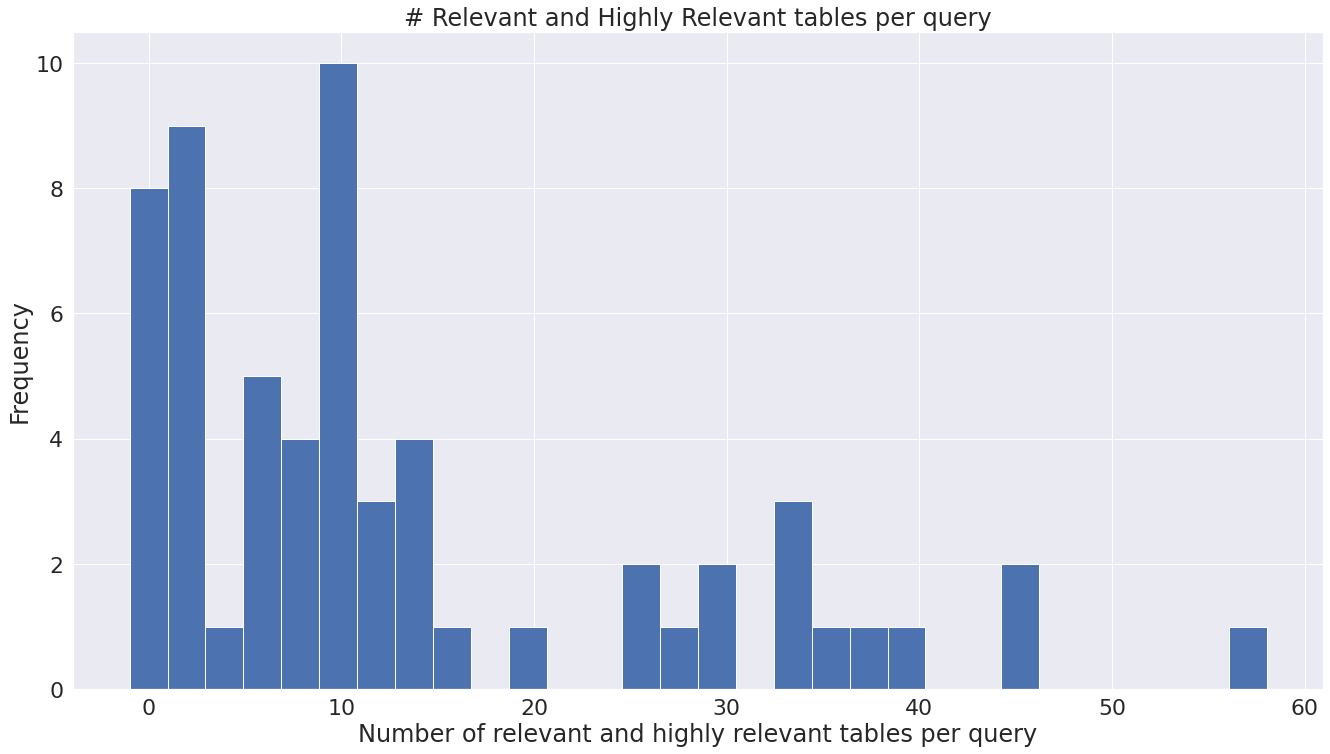

In [6]:
ax = plt.hist(x=num_rel_and_high_rel_tables_per_query, bins=30, align='left')
plt.ylabel('Frequency');plt.xlabel('Number of relevant and highly relevant tables per query');plt.title("# Relevant and Highly Relevant tables per query");plt.tight_layout()

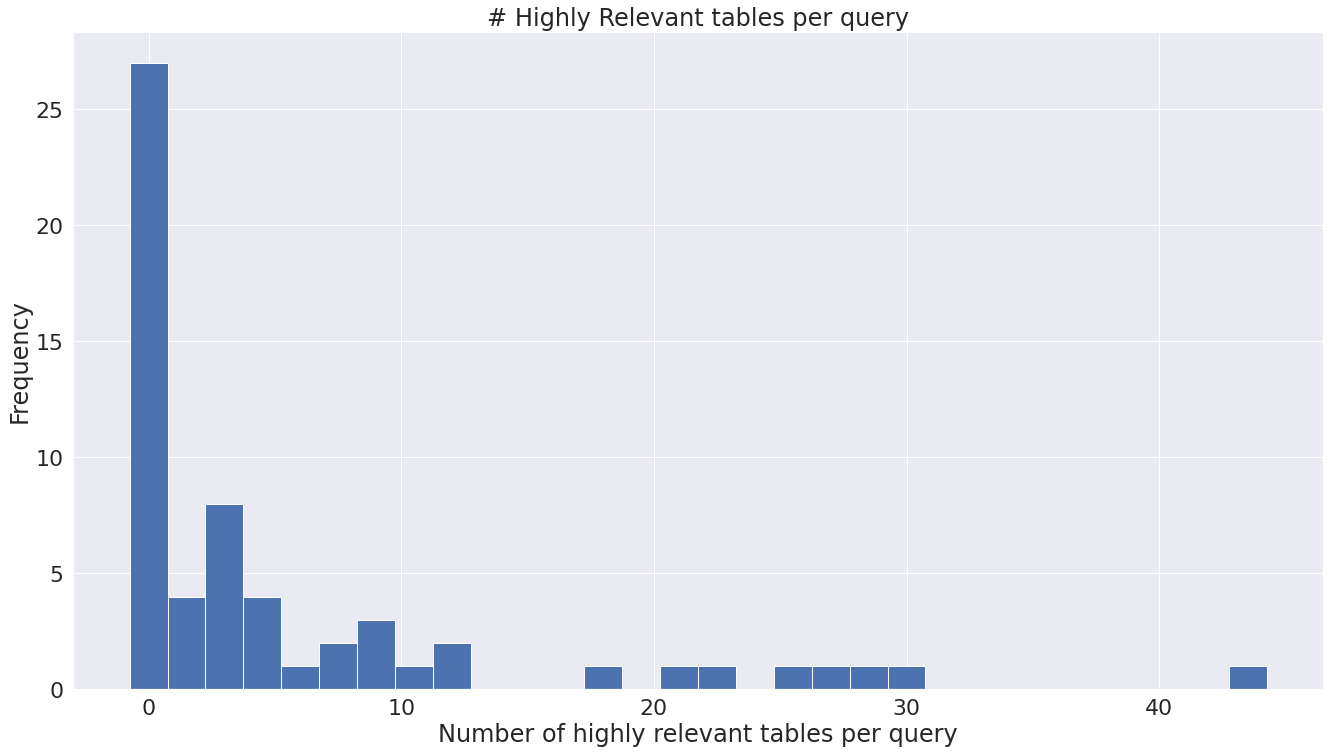

In [7]:
ax = plt.hist(x=num_high_rel_tables_per_query, bins=30, align='left')
plt.ylabel('Frequency');plt.xlabel('Number of highly relevant tables per query');plt.title("# Highly Relevant tables per query");plt.tight_layout()

## Relevant + Highly Relevant

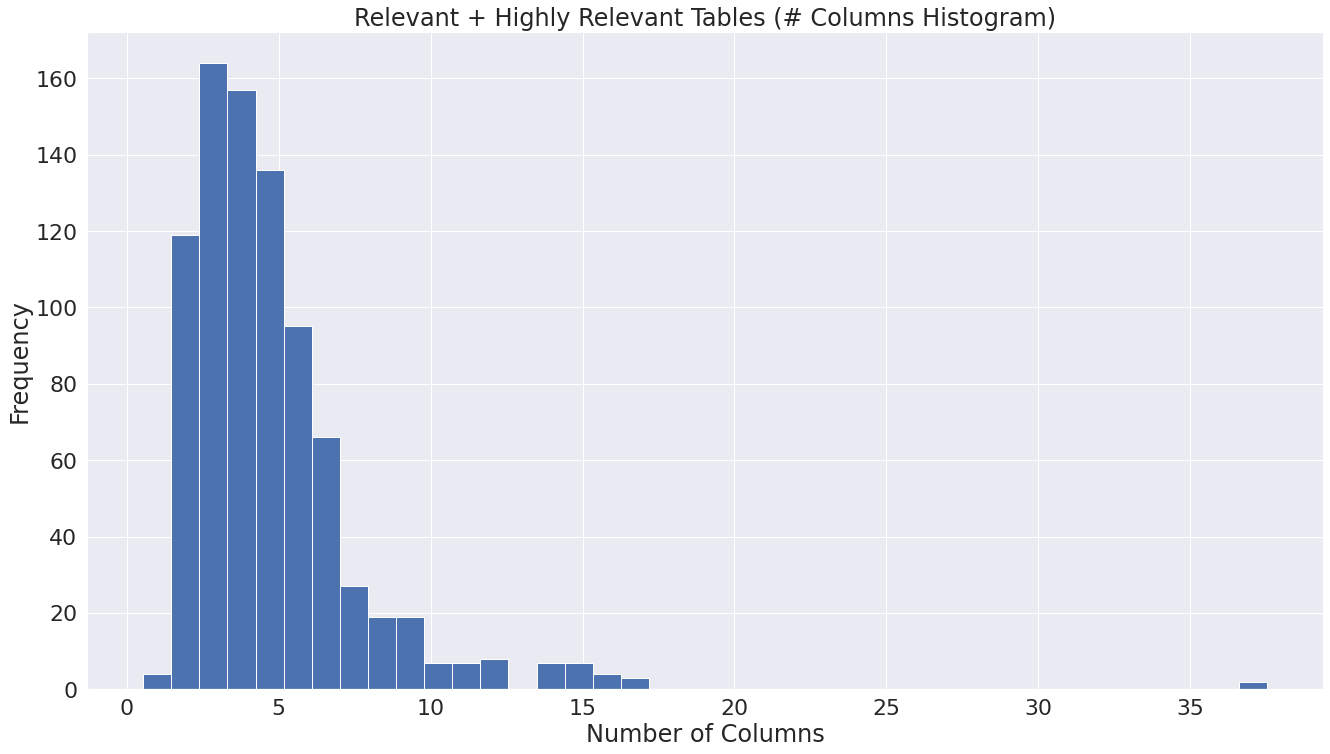

In [8]:
ax = plt.hist(x=df_relevant_and_highly_relevant['num_columns'], bins=40, align='left')
plt.ylabel('Frequency');plt.xlabel('Number of Columns');plt.title("Relevant + Highly Relevant Tables (# Columns Histogram)");plt.tight_layout()

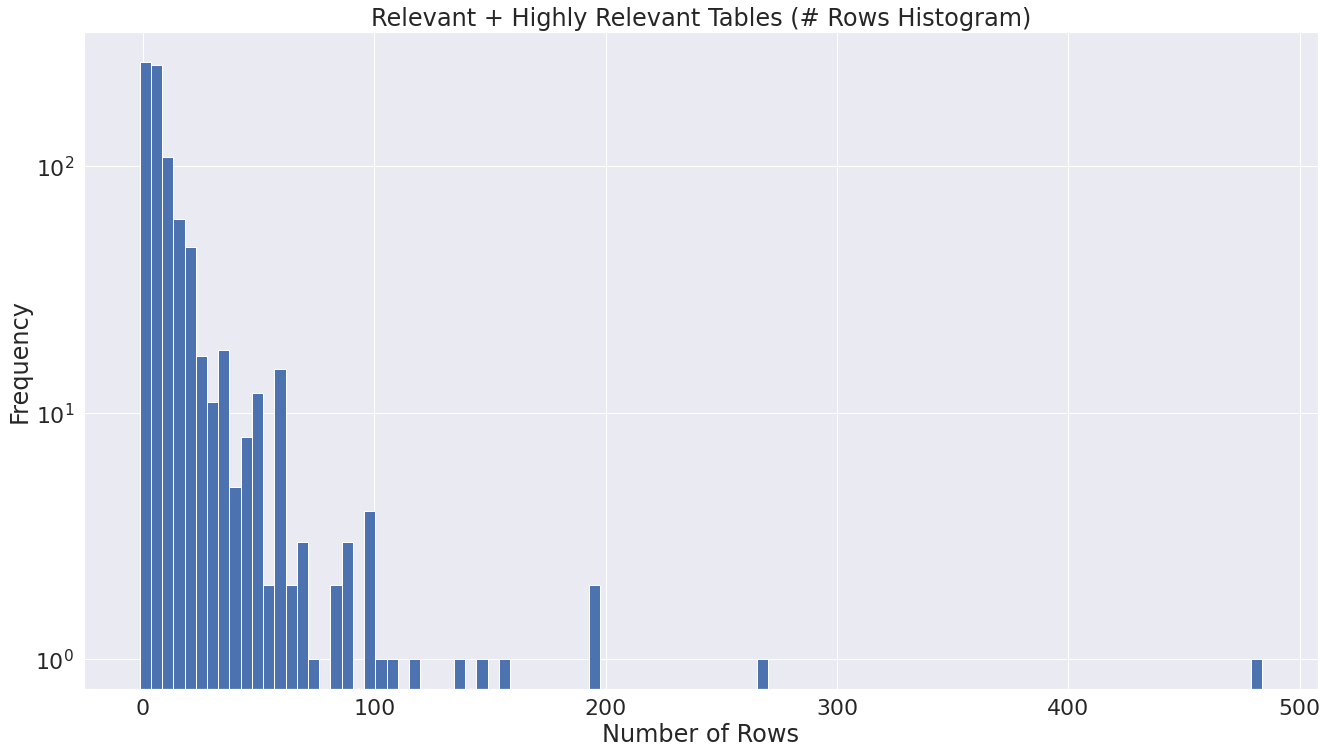

In [9]:
ax = plt.hist(x=df_relevant_and_highly_relevant['num_rows'], bins=100, align='left')
plt.yscale("log");plt.ylabel('Frequency');plt.xlabel('Number of Rows');plt.title("Relevant + Highly Relevant Tables (# Rows Histogram)");plt.tight_layout()

## Highly Relevant

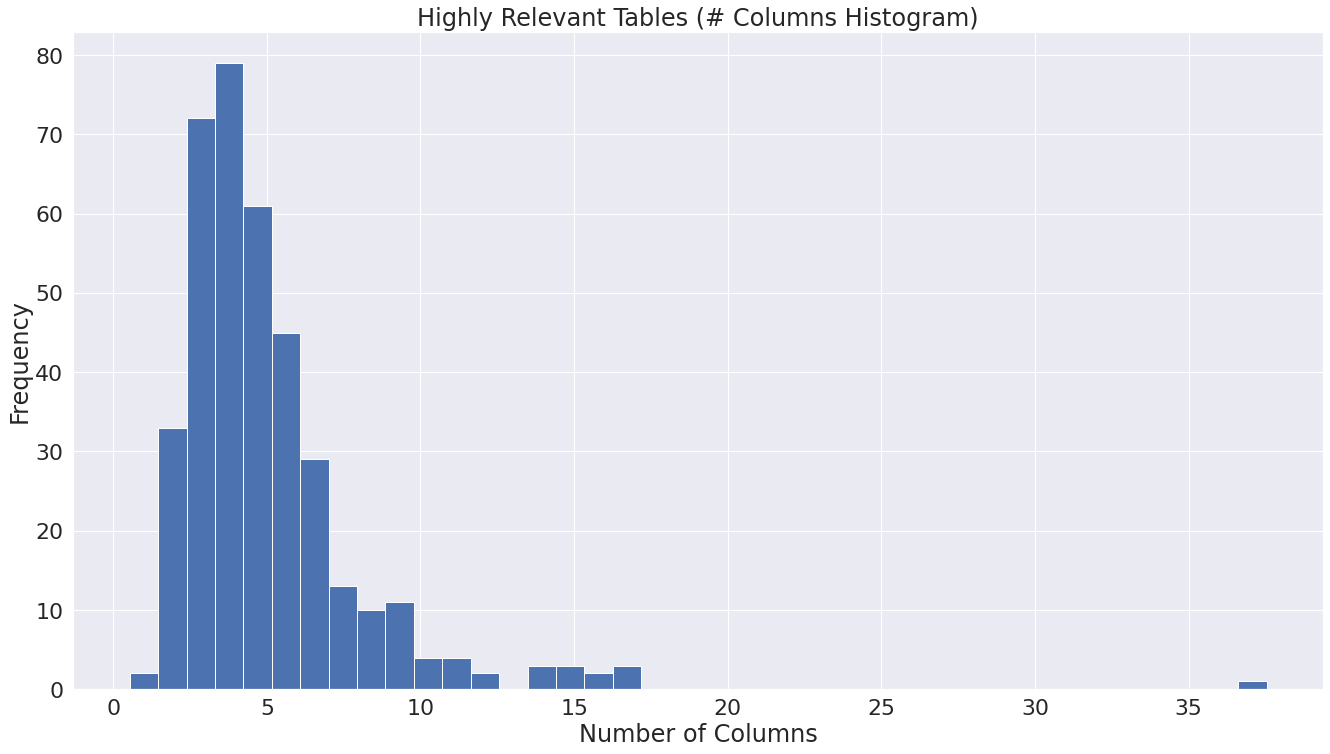

In [10]:
ax = plt.hist(x=df_highly_relevant['num_columns'], bins=40, align='left')
plt.ylabel('Frequency');plt.xlabel('Number of Columns');plt.title("Highly Relevant Tables (# Columns Histogram)");plt.tight_layout()

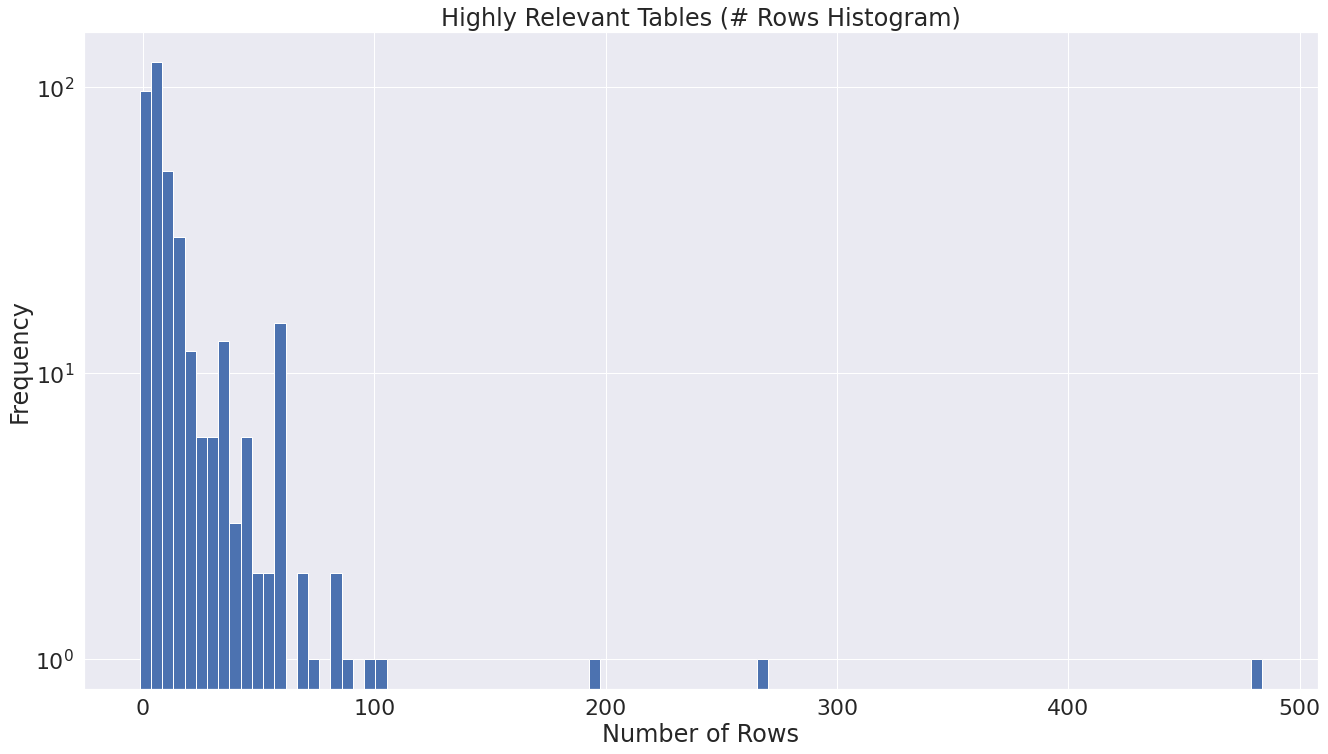

In [11]:
ax = plt.hist(x=df_highly_relevant['num_rows'], bins=100, align='left')
plt.yscale("log");
plt.ylabel('Frequency');plt.xlabel('Number of Rows');plt.title("Highly Relevant Tables (# Rows Histogram)");plt.tight_layout()

# Query Relevances Cleaned

In [12]:
df = pd.read_pickle("query_relevances_cleaned_df.pickle")
df_relevant_and_highly_relevant = df[df['relevance']>0]
df_highly_relevant = df[df['relevance']>1]
df


,query_id,column2,table_id,relevance,num_columns,num_rows,num_numeric_columns
379,8,0,table-1610-48,2.0,3,17,0
380,8,0,table-0145-207,2.0,8,49,0
381,8,0,table-0633-54,1.0,2,11,0
384,8,0,table-0176-187,1.0,8,17,0
385,8,0,table-1389-264,1.0,7,15,0
...,...,...,...,...,...,...,...
3113,60,0,table-0604-492,0.0,9,25,0
3114,60,0,table-0631-704,0.0,5,25,1
3115,60,0,table-0632-243,0.0,5,26,1
3117,60,0,table-0180-80,0.0,5,18,1


In [13]:
# Dataframe statistics
print("There are", df_relevant_and_highly_relevant['table_id'].nunique(), 'unique relevant and highly relevant tables')
print("There are", df_highly_relevant['table_id'].nunique(), 'unique highly relevant tables')

# Find the number of unique relevant & highly relevant tables per query
num_rel_and_high_rel_tables_per_query = []
num_high_rel_tables_per_query = []
for q_id in df['query_id'].unique():
    rel_and_high_rel_tmp_df = df[(df['query_id'] == q_id) & (df['relevance']>0)]
    num_rel_and_high_rel_tables_per_query.append(rel_and_high_rel_tmp_df['table_id'].nunique())

    rel_and_high_rel_tmp_df = df[(df['query_id'] == q_id) & (df['relevance']>1)]
    num_high_rel_tables_per_query.append(rel_and_high_rel_tmp_df['table_id'].nunique())

There are 285 unique relevant and highly relevant tables
There are 193 unique highly relevant tables


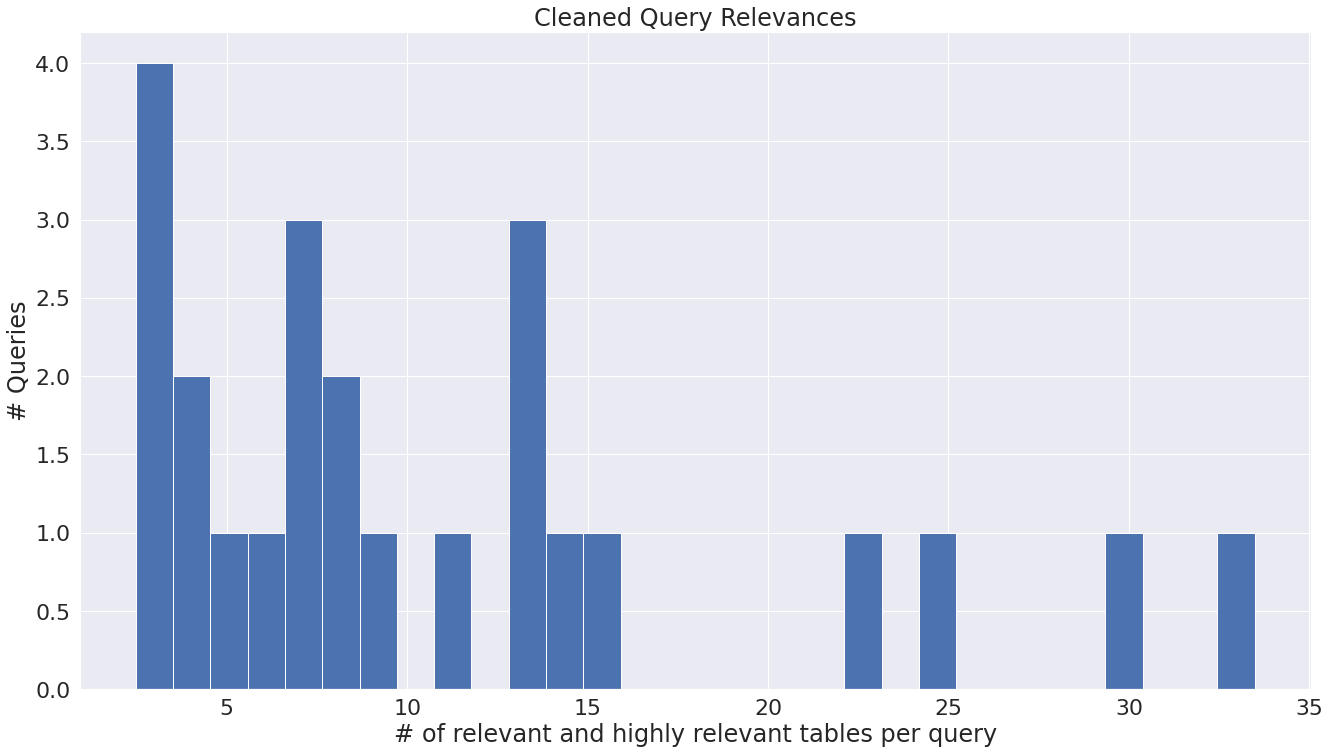

In [14]:
ax = plt.hist(x=num_rel_and_high_rel_tables_per_query, bins=30, align='left')
plt.ylabel('# Queries');plt.xlabel('# of relevant and highly relevant tables per query');plt.title("Cleaned Query Relevances");plt.tight_layout()

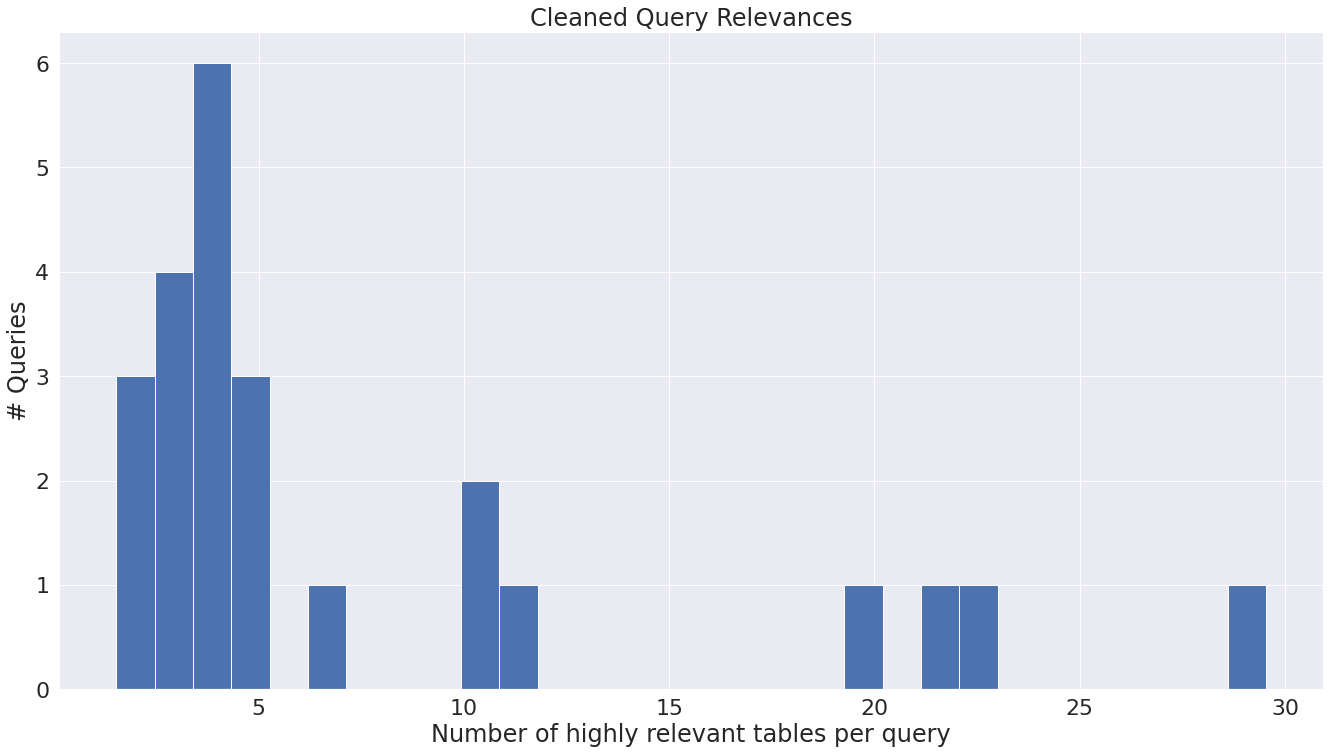

In [15]:
ax = plt.hist(x=num_high_rel_tables_per_query, bins=30, align='left')
plt.ylabel('# Queries');plt.xlabel('Number of highly relevant tables per query');plt.title("Cleaned Query Relevances");plt.tight_layout()

## Create test dataset

In [17]:
tables = df['table_id'].unique()
copy_from_path = "../../tables/wikitables/files/www18_wikitables/"
dest_path = "../../tables/wikitables/files/www18_wikitables_test/"
for table in tables:
    shutil.copy(copy_from_path + table + ".json", dest_path)